<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
Importing Libraries and Tools
</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
# import tensorflow as tf

from IPython.core.display import display, HTML

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
 Data Preprocessing
</h1>

In [2]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train,test], ignore_index=True)

In [3]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
df.shape

(74498, 24)

In [5]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
Exploring null values
</h3>

In [6]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
Dropping Employye ID as it is irrelevant
</h3>

In [7]:
df.drop("Employee ID", axis=1, inplace=True)
train.drop("Employee ID", axis=1, inplace=True)
test.drop("Employee ID", axis=1, inplace=True)

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
 Grouping coloumns into categorical and numerical
</h3>

In [8]:
categorical = [i for i in df.columns if df[i].nunique() <= 7]
categorical_train = [i for i in df.columns if train[i].nunique() <= 7]
numerical = [i for i in df.columns if i not in categorical]

In [9]:
categorical

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Number of Promotions',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Number of Dependents',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

In [10]:
numerical

['Age',
 'Years at Company',
 'Monthly Income',
 'Distance from Home',
 'Company Tenure']

<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
Exploratory Data Analysis (EDA) 
</h1>

## Categorical Variable Distribution (Bar Plots)

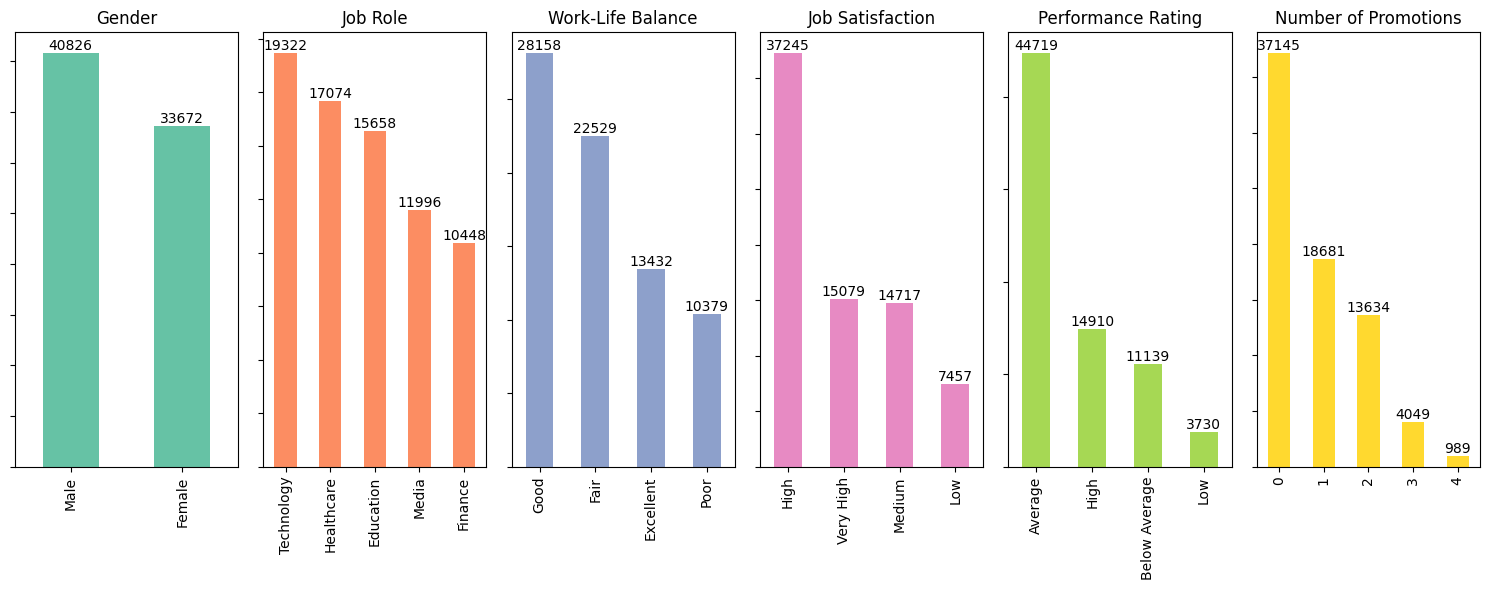

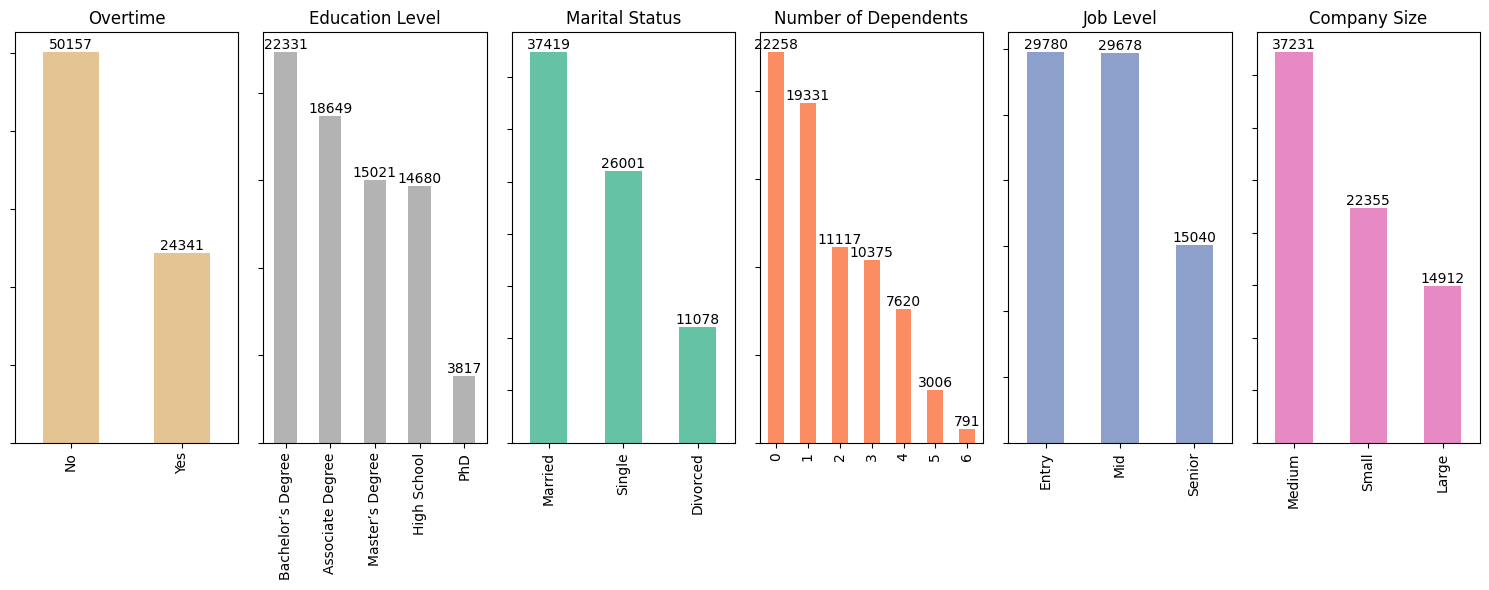

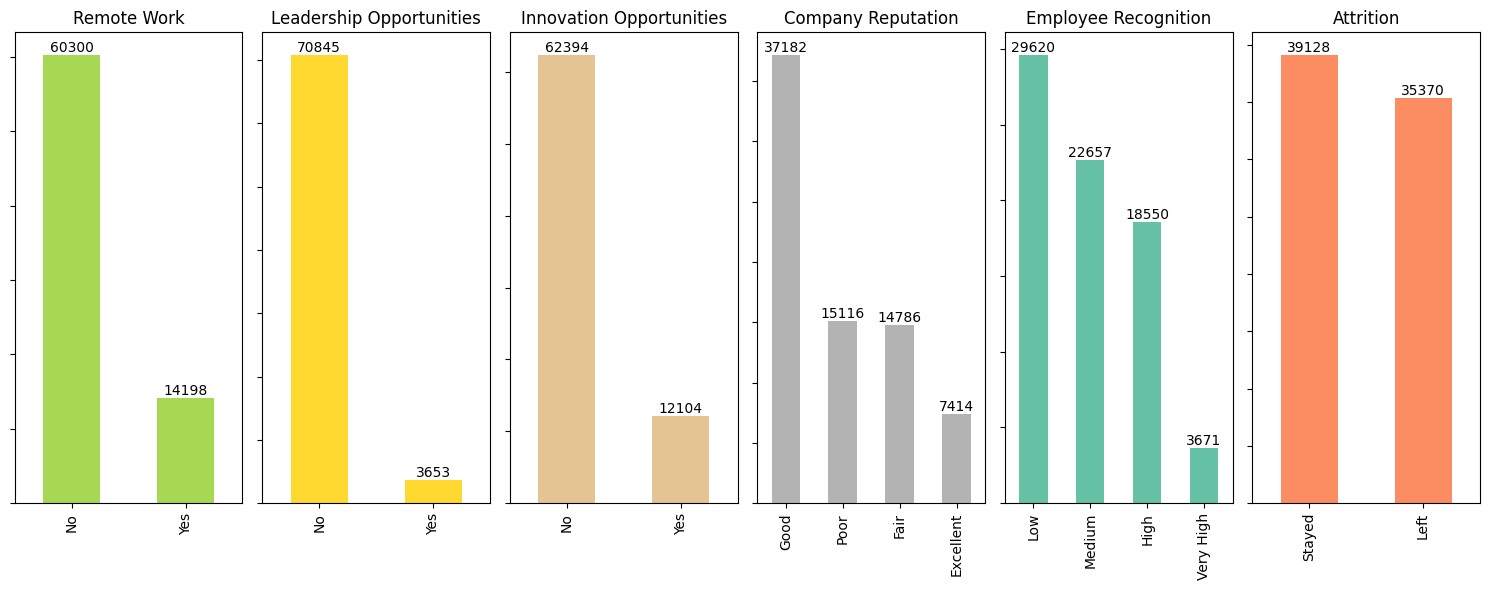

In [11]:
index = 0
# colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "cyan", "magenta"]
colors = sns.color_palette("Set2", 18)  # Adjusted for 18 categorical plots (3x6)
for i in range(3):
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    for j in range(6):
        count = df[categorical[index]].value_counts()
        # color_choice = random.choice(colors)  # Randomly select a color for each plot
        color_choice = colors[index % len(colors)]
        count.plot(kind="bar", ax=axes[j], color=color_choice)
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(categorical[index])
        index += 1
    plt.tight_layout()
    plt.show()


* The first visualization uses bar plots to show the frequency distribution of categorical variables.
* Each subplot represents a different categorical feature, with distinct colors assigned.
* The bars are labeled with counts, improving readability.
* Insights: Helps identify class imbalances or dominant categories in features like department, job role, or attrition.


## Categorical vs. Target Variable (Heatmaps)


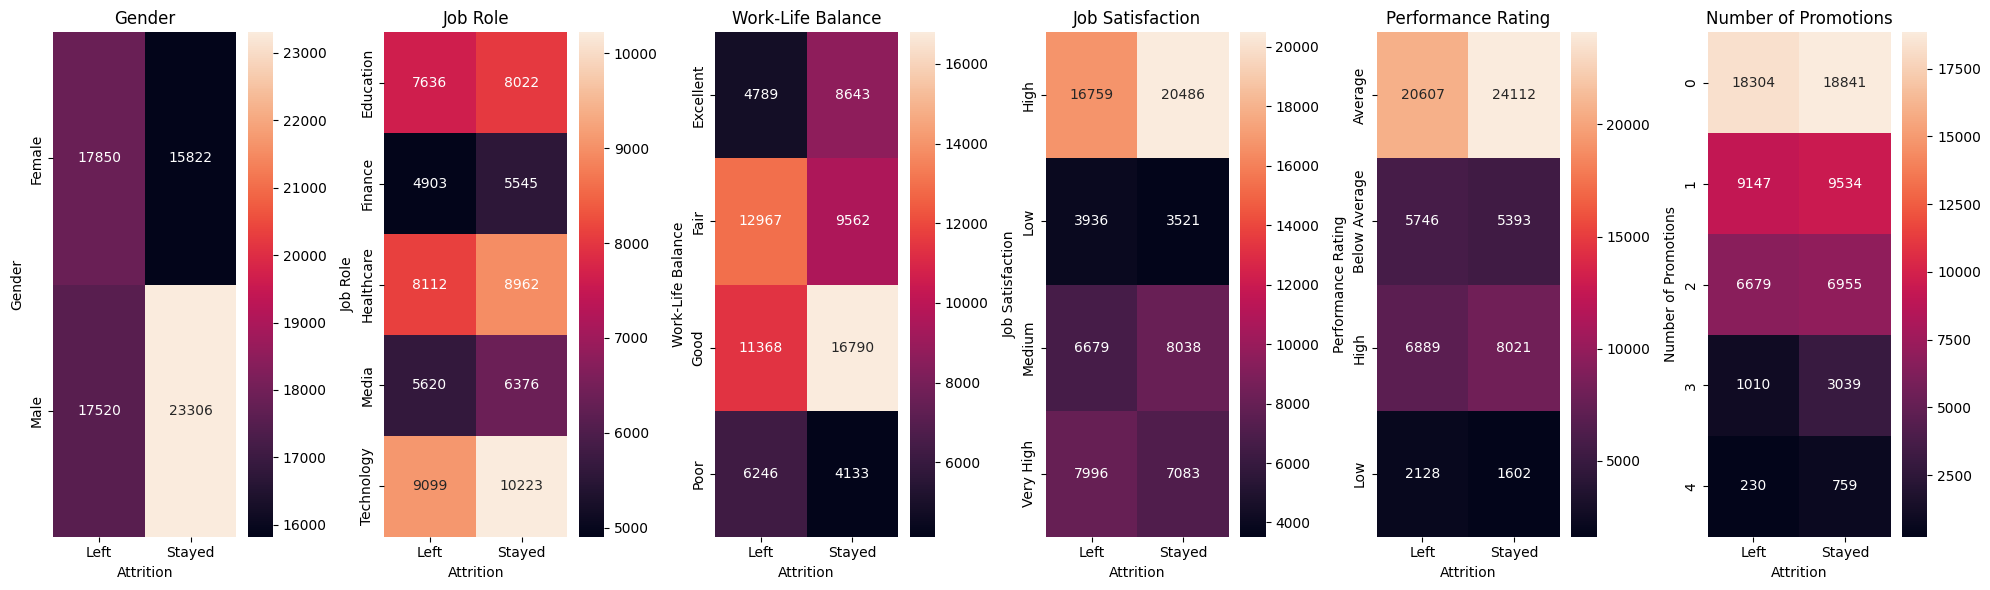

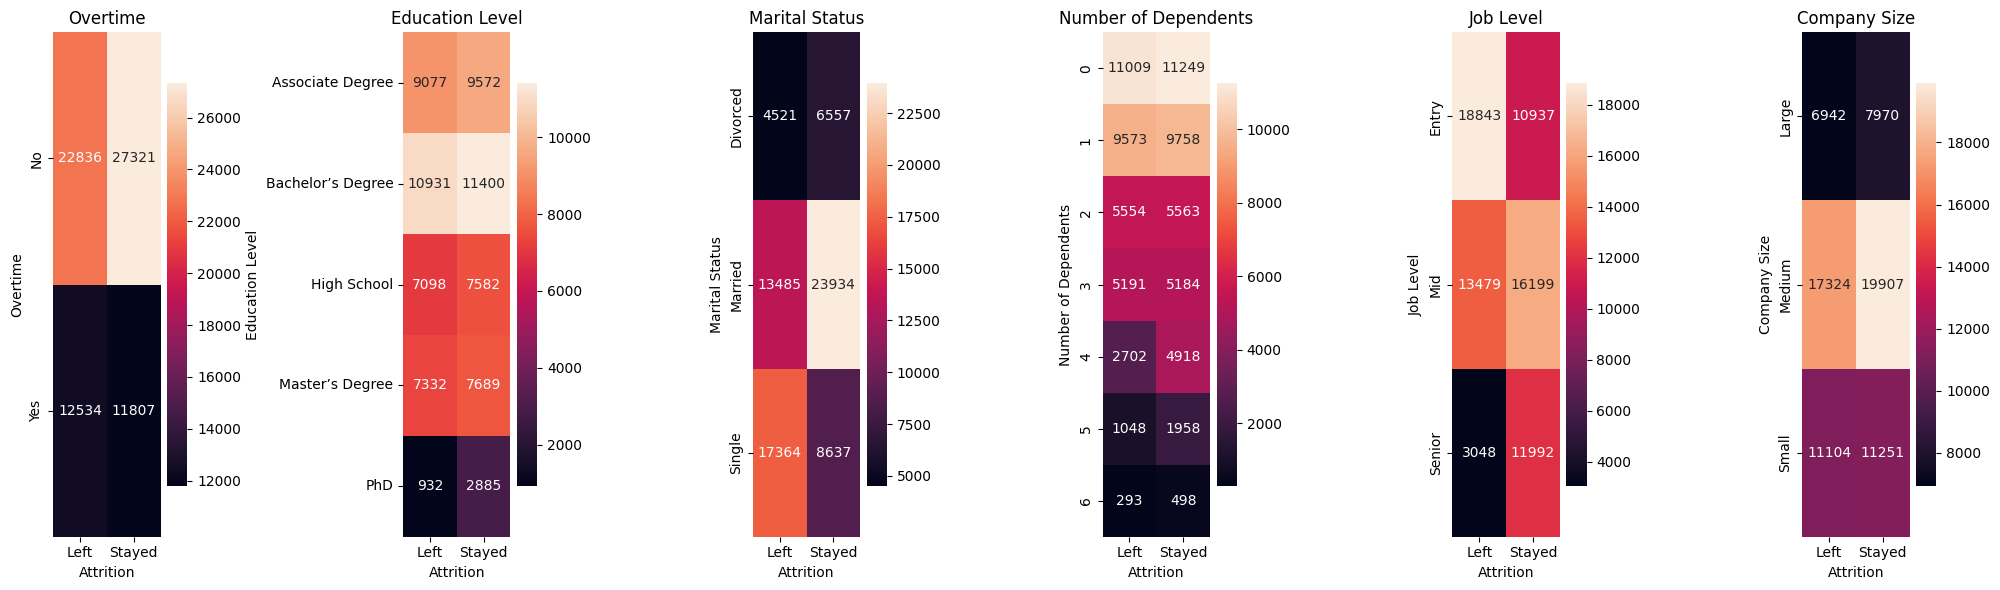

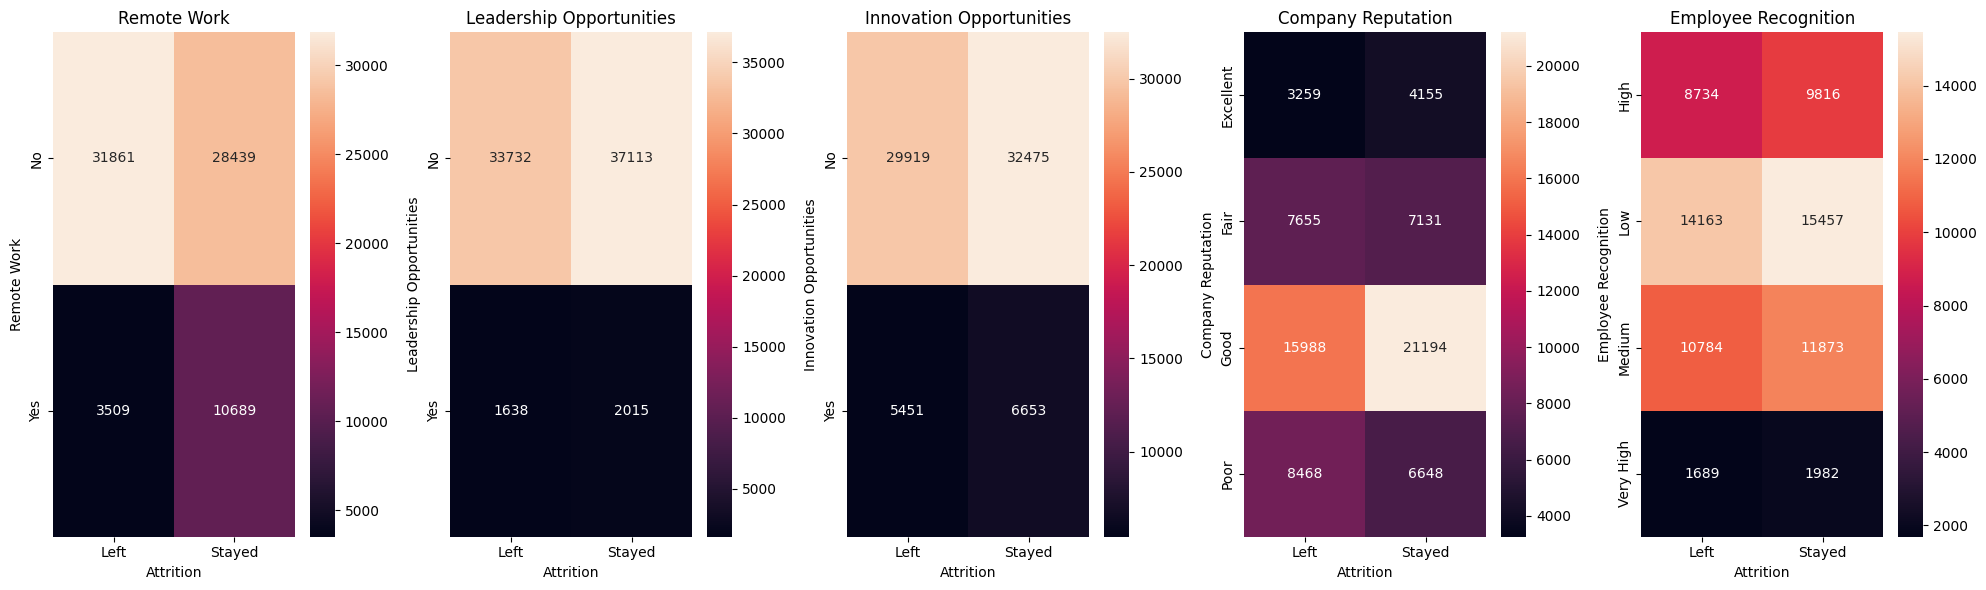

In [12]:
index = 0

for i in range(3):
    length = 5
    if i == 2:
        fig, axes = plt.subplots(ncols=5, figsize=(20, 6))
    else:
        fig, axes = plt.subplots(ncols=6, figsize=(20, 6))
        length += 1
        
    for j in range(length):
        sns.heatmap(pd.crosstab(df[categorical[index]], df[categorical[-1]]), annot=True, fmt='d', ax=axes[j])
        axes[j].set_title(categorical[index])
        index += 1
    plt.tight_layout()
    plt.show()




* The set of plots uses heatmaps to show the relationship between categorical variables and the target variable.
* The cross-tabulated values are displayed with annotation.
* Insights: Useful for spotting correlations, e.g., which job roles have higher attrition rates.

## Numerical Data Distributions

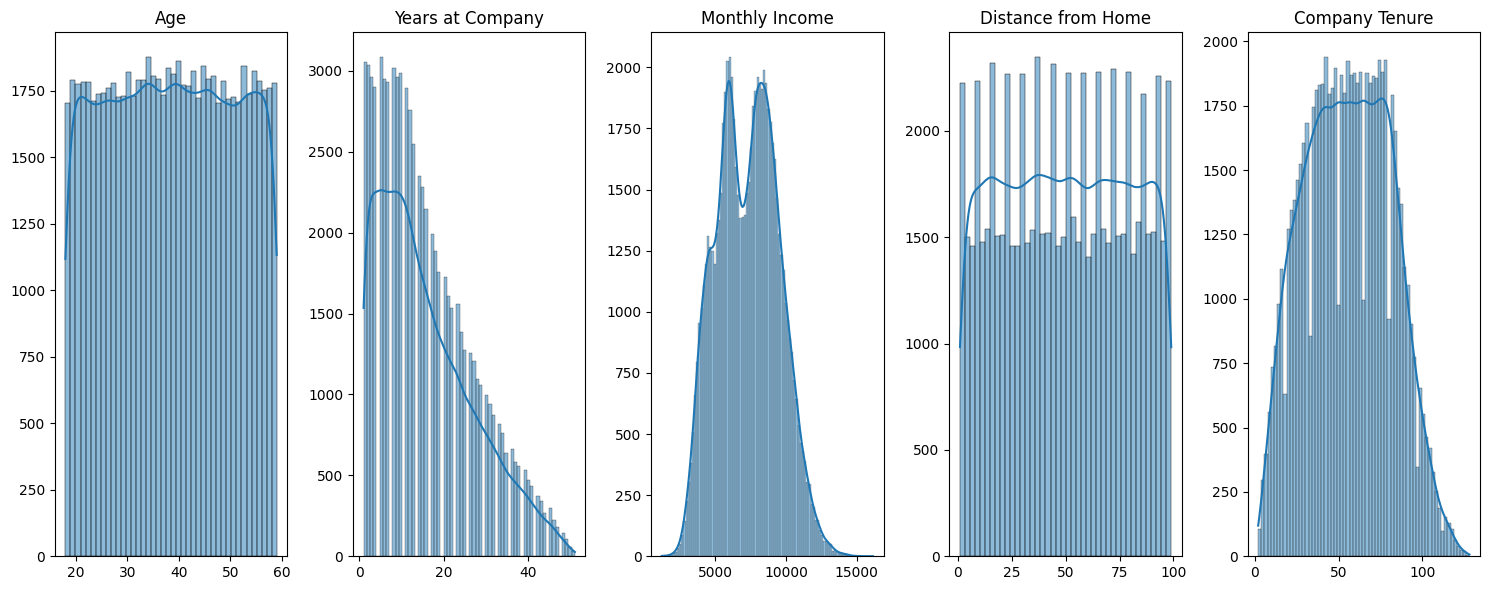

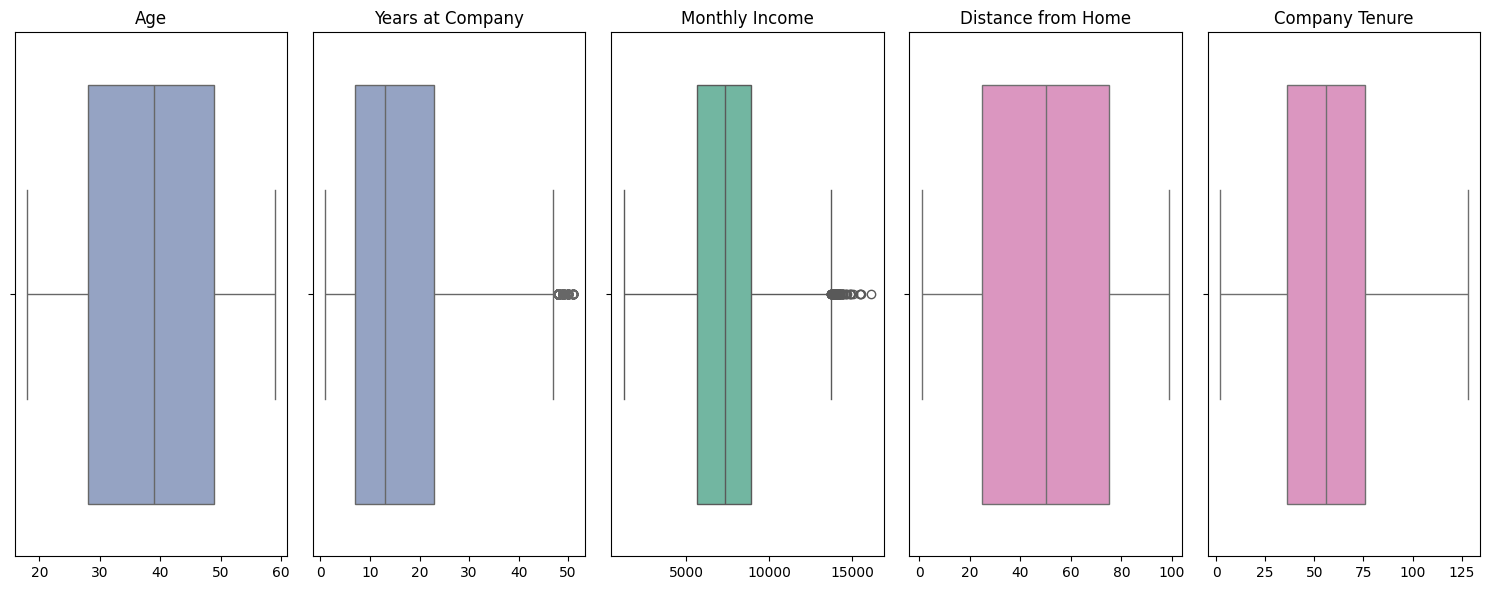

In [13]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
colors = sns.color_palette("Set2", len(numerical))
for i, j in enumerate(numerical):

    sns.histplot(df, x=j, ax=axes[i],palette=colors,kde=True)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(numerical):
    color_choice = random.choice(colors) 
    sns.boxplot(df, x=j, color=color_choice,ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()



**Histograms & KDE Plots**

* Histograms show the distribution of numerical features like age, salary, or years at the company.
* KDE (Kernel Density Estimation) overlays help visualize the probability density.
* Insights: Highlights skewness, multimodal distributions, and outliers.
  
**Box Plots for Outlier Detection**

* Box plots visualize the spread and presence of outliers in numerical variables.
* Insights: Helps detect extreme values that might require data preprocessing.

## pairplot 

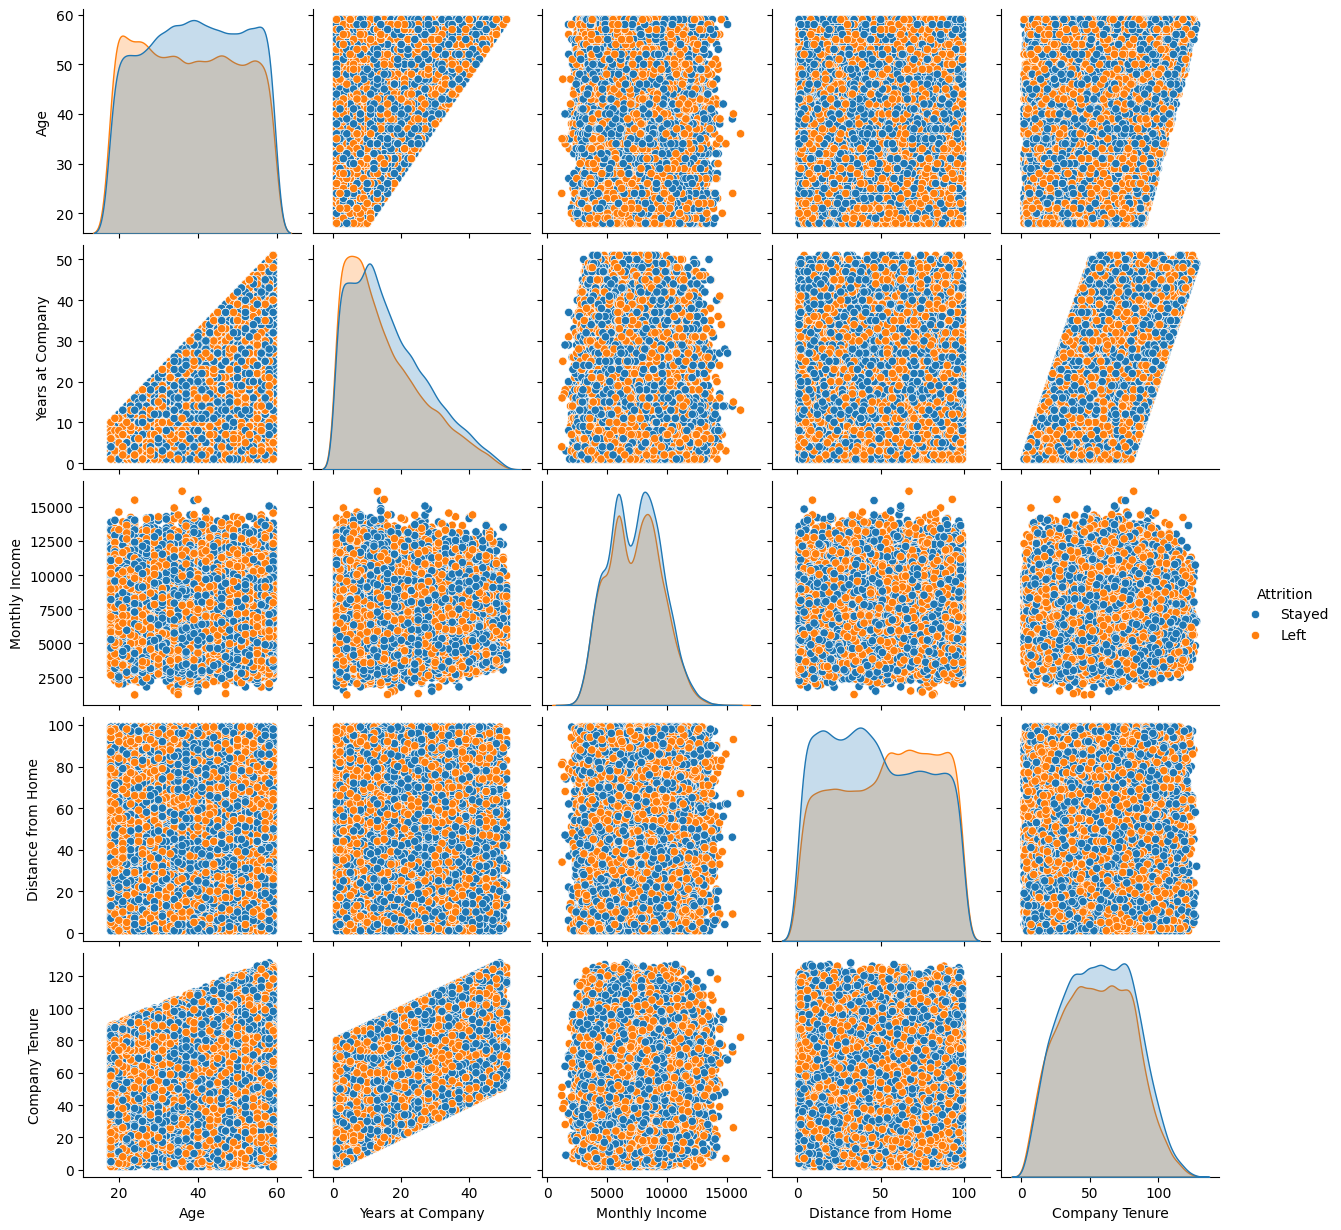

In [14]:
sns.pairplot(df, vars=numerical, hue=categorical[-1])
plt.show()


* Plots all numerical features against each other 
* Uses the last categorical feature as a color grouping

  **Correlation Between Features**

* If two features show a linear relationship, one may be redundant (e.g., "Years at Company" & "Years in Current Role").
* If features are uncorrelated, they provide independent information for the model.

**Clusters of Attrition (if hue="Attrition" was used)**

* Helps identify where employees who left (Attrition = 1) cluster.
* Eg . employees with low "Work-Life Balance" & "Overtime" tend to have high attrition, these could be key predictors.
  

## Distribution of number of  promotions among employees

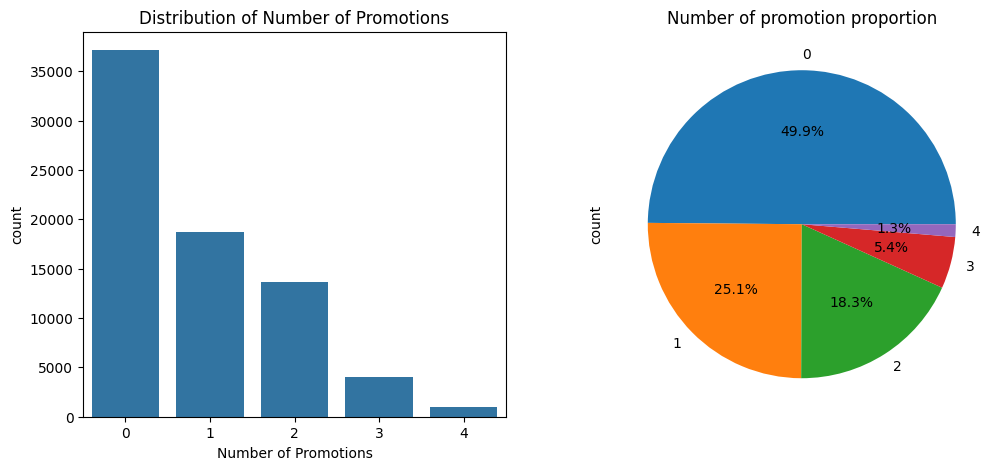

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Number of Promotions'])
plt.title('Distribution of Number of Promotions')
plt.subplot(1,2,2)
df['Number of Promotions'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Number of promotion proportion')
plt.show()



**Most employees have few or no promotions**

* A large portion of employees have 0 or 1 promotions, this suggests either slow career progression or strict promotion policies.


* very few employees have 3+ promotions, those cases may need special handling in the model (e.g., grouping rare cases together).

## Job role based on gender

Gender      Female   Male
Job Role                 
Education     6950   8708
Finance       4696   5752
Healthcare    7696   9378
Media         5492   6504
Technology    8838  10484


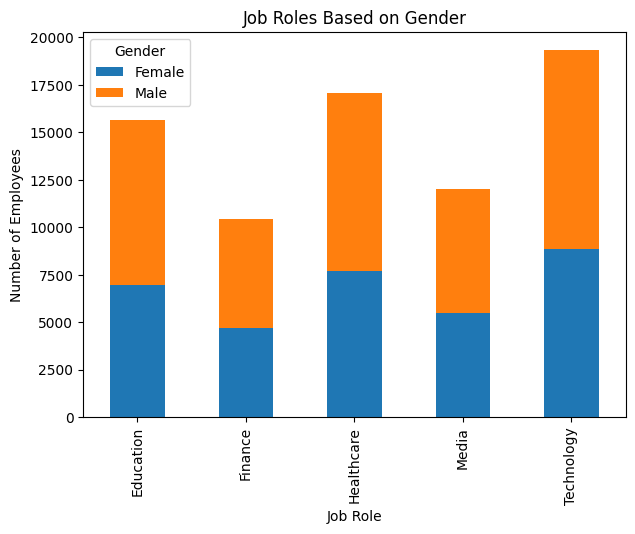

In [16]:
grouped = df.groupby(['Job Role', 'Gender']).size().unstack(fill_value=0)
print(grouped)
grouped.plot(kind='bar',stacked=True, figsize=(7, 5))
plt.title('Job Roles Based on Gender')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.legend(title='Gender')
plt.show()



* male is dominated over female
* one gender is more concentrated in high-attrition roles, it might affect the attrition trends in the dataset.

## Performance Rating Based on Gender

Gender              Female   Male
Performance Rating               
Average              20123  24596
Below Average         5043   6096
High                  6755   8155
Low                   1751   1979


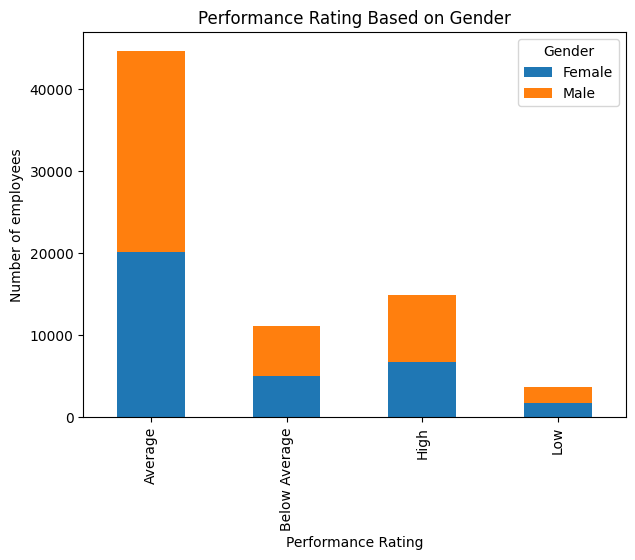

In [17]:
grouped = df.groupby(['Performance Rating', 'Gender']).size().unstack(fill_value=0)
print(grouped)
grouped.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Performance Rating Based on Gender')
plt.ylabel('Number of employees')
plt.xlabel('Performance Rating')
plt.legend(title='Gender')

## Employee Recognition Based on Gender

Gender                Female   Male
Employee Recognition               
High                    8439  10111
Low                    13449  16171
Medium                 10114  12543
Very High               1670   2001


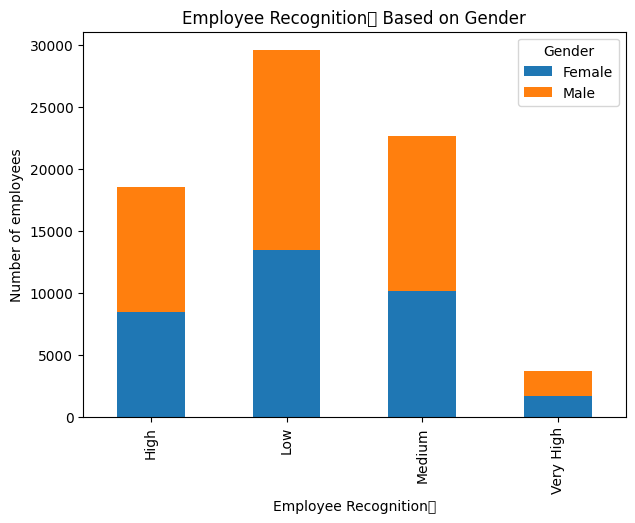

In [18]:
grouped = df.groupby(['Employee Recognition', 'Gender']).size().unstack(fill_value=0)
print(grouped)
grouped.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Employee Recognition	 Based on Gender')
plt.ylabel('Number of employees')
plt.xlabel('Employee Recognition	')
plt.legend(title='Gender')

**Above plots on gender shows that male gender is more concentrated in high-attrition roles**

---

##  Company Insights from EDA

The exploratory data analysis revealed several important insights about the company's workforce and potential factors driving employee attrition:

- **Age Distribution**: Most employees were between 30 and 40 years old. Younger employees showed a slightly higher tendency to leave.
- **Job Role Trends**: Job roles like "Sales Executive" and "Laboratory Technician" had higher attrition rates compared to other roles.
- **Monthly Income**: Employees with lower monthly income tended to have a higher attrition rate. A sharp drop-off in attrition was observed for those earning above a certain income threshold.
- **Work-Life Balance**: Employees rating their work-life balance as poor had a higher likelihood of leaving.
- **Job Satisfaction**: Lower job satisfaction scores were strongly correlated with attrition.
- **OverTime**: One of the most significant predictors. Employees working overtime were far more likely to leave the company.
- **Department and Education**: No strong direct relationship was found between attrition and department/education, but subtle trends suggest that specific combinations (e.g., low education + high overtime) may increase risk.
- **Years at Company**: Newer employees (0-3 years) showed a noticeably higher attrition rate compared to experienced staff.

These insights help HR and management teams pinpoint problem areas and refine retention strategies, such as adjusting overtime expectations, improving job satisfaction, and targeting high-risk job roles with proactive engagement.


<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
 Training of Models
</h>

In [25]:
le = LabelEncoder()

for i in categorical_train:
    if "number" not in i.lower():
        train[i] = le.fit_transform(train[i].values)
        test[i] = le.transform(test[i].values)

In [26]:
x_train = train.iloc[:, :-1].values
x_test = test.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    return score*100, report, cm

In [28]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
xgb = XGBClassifier()
lgb = LGBMClassifier()
svc = SVC()

models = [rfc, gbc, abc, etc,
         lgr, xgb, lgb, svc]

names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Extra Trees",
        "Logistic Regression", "XGBoost", "LightGBM", "SVC"]

In [32]:
scores, reports, cms = [], dict(), dict()

for i, j in zip(models, names):
    score, report, cm = training(i)
    scores += [score]
    reports[j] = report
    cms[j] = cm

[LightGBM] [Info] Number of positive: 31260, number of negative: 28338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 59598, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524514 -> initscore=0.098136
[LightGBM] [Info] Start training from score 0.098136


<h1 style="text-align: center; background: linear-gradient(to right, #2c3e50, #34495e, #1abc9c, #16a085); color: white; padding: 10px; border-radius: 5px;">
 Model Evaluation
</h1>

## Accuracy of models



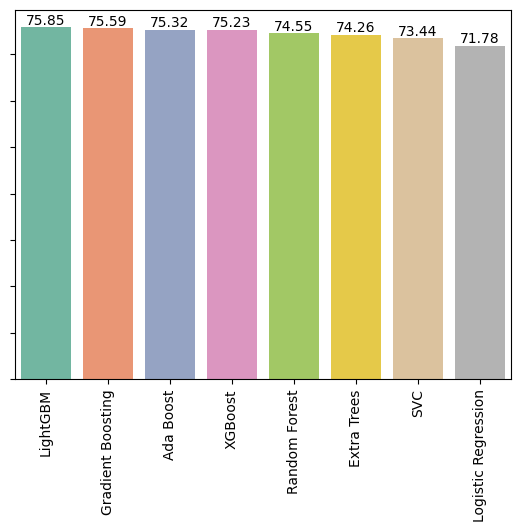

In [33]:



dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()

colors = sns.color_palette("Set2", len(dd))  # "Set2" provides distinct colors
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes, palette=colors )

for container in axes.containers:
    axes.bar_label(container)
axes.set_yticklabels(())
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

## Model Evaluation Metrics

In [34]:
for i in dd.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
LightGBM
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      7059
           1       0.77      0.77      0.77      7841

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      6973
           1       0.77      0.77      0.77      7927

    accuracy                           0.76     14900
   macro avg       0.75      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900




******************************
Ada Boost
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6826
           1       0.78      0.76      0.77      8074

    accuracy                           0.75   

**f1score all models are balanced so there is no error in accuracy of the models**


##  Confusion Matrix

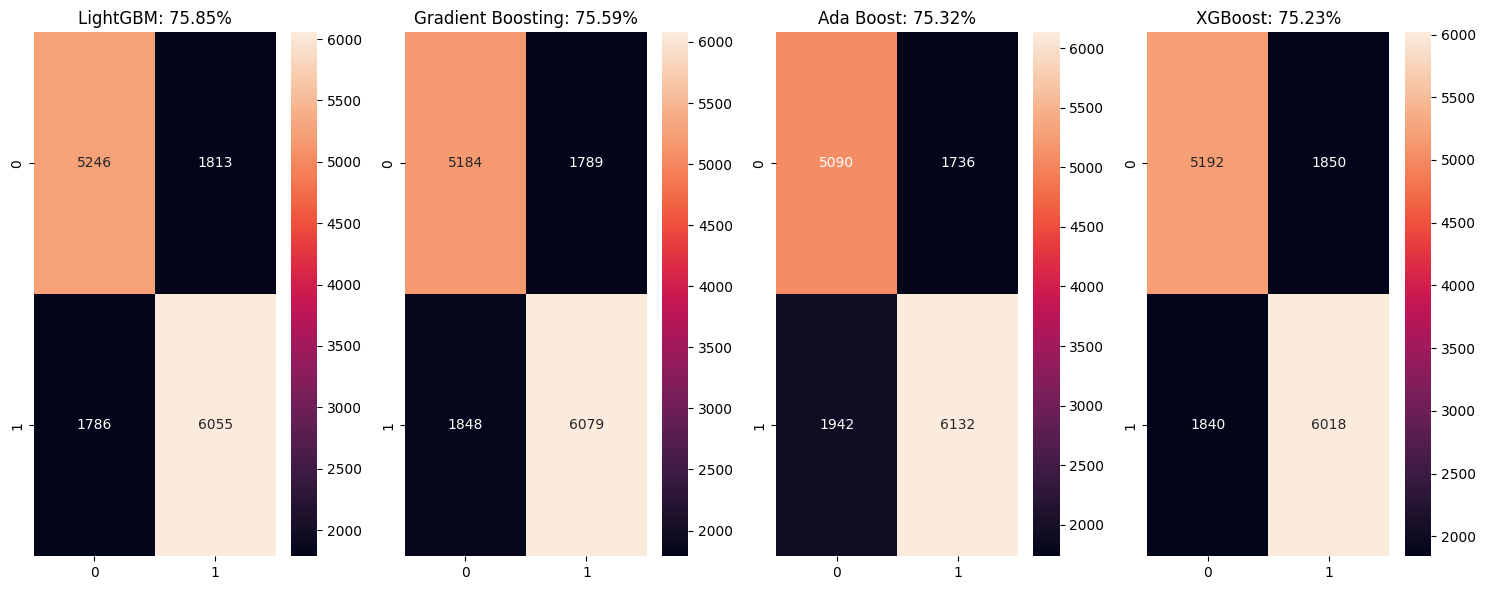

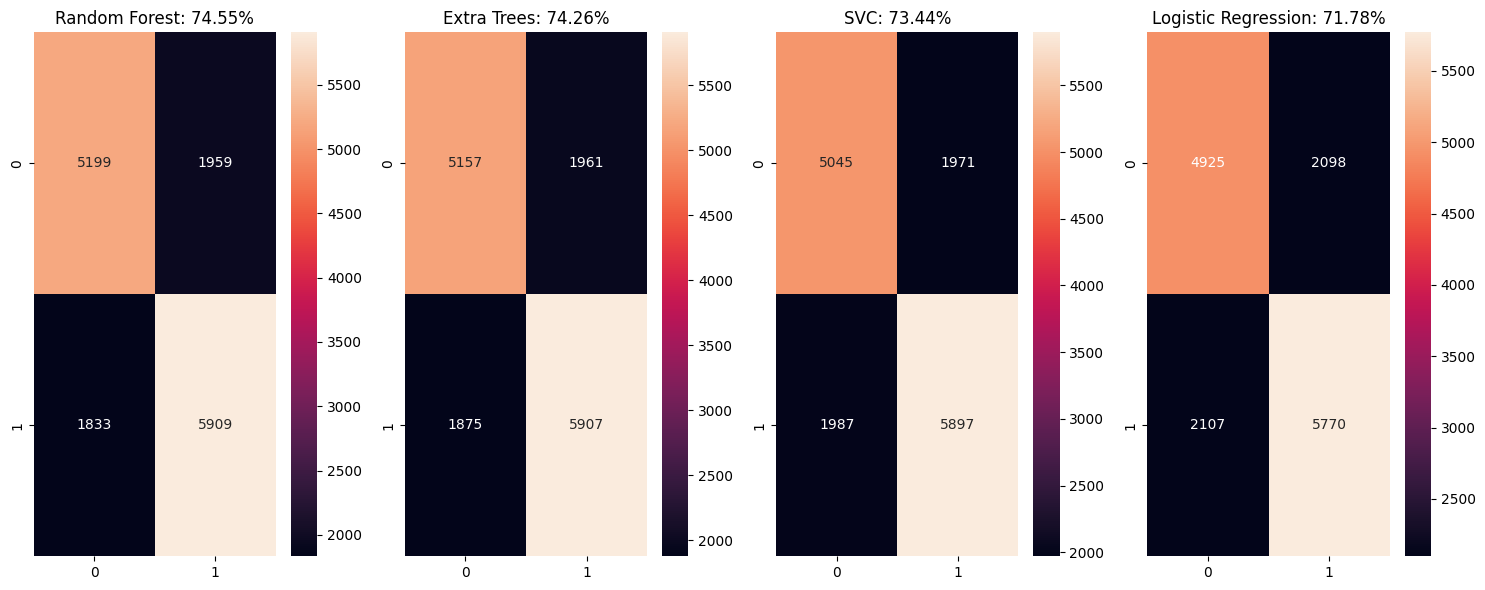

In [35]:
index = 0
total_items = len(dd.index)  # Get the total number of elements

for _ in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        if index >= total_items:  # Prevent out-of-bounds error
            break  
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
        axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1  # Increment index to move to the next dataset
    plt.tight_layout()
    plt.show()
    

# Conlusion 
### Light GBM gives more accuary then all other models